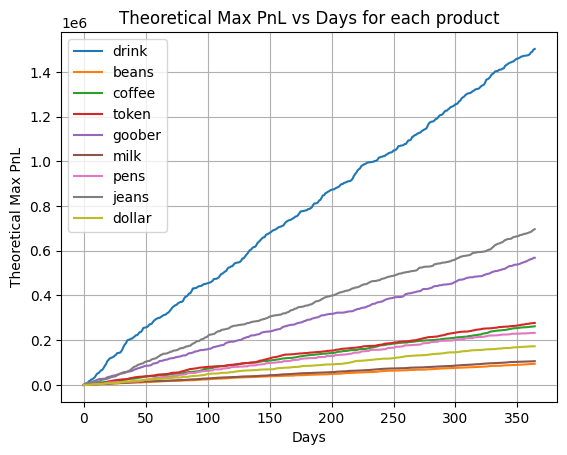

In [23]:
import pandas as pd

# load all products data into a dataframe
drink = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Fun Drink_price_history.csv')
beans = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Coffee Beans_price_history.csv')
coffee = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Coffee_price_history.csv')
token = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Fintech Token_price_history.csv')
goober = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Goober Eats_price_history.csv')
milk = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Milk_price_history.csv')
pens = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Red Pens_price_history.csv')
jeans = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Thrifted Jeans_price_history.csv')
dollar = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/UQ Dollar_price_history.csv')
# put all dataframes into a list
dataframes = [drink, beans, coffee, token, goober, milk, pens, jeans, dollar]
# create a list of the names of the products
products = ['drink', 'beans', 'coffee', 'token', 'goober', 'milk', 'pens', 'jeans', 'dollar']
pos_limits = [10e3, 200, 30e3, 35, 75e3, 2.5e3, 40e3, 400, 650]

# use the above logic to create a function that will do this for all dataframes in the list 
def create_pnl(df, pos_limit):
    df['Diff'] = df['Price'].diff()
    df['AbsDiff'] = df['Diff'].abs()
    df['CumAbsDiff'] = df['AbsDiff'].cumsum()

    # create a column so that for row x, if row x+1['AbsDiff'] is positive, row x['Buy'] is 1, otherwise -1
    df['Buy'] = df['Diff'].shift(-1)
    df['Buy'] = df['Buy'].apply(lambda x: 1 if x > 0 else -1)
    df['Buy'] = df['Buy'].fillna(0)

    df['StockPosition'] = pos_limit*df['Buy']
    df['Transaction'] = df['StockPosition'].diff()
    df['Transaction'] = df['Transaction'].fillna(0 + df['StockPosition'])

    df['CashFlow'] = -df['Transaction'] * df['Price']
    df['CashPos'] = df['CashFlow'].cumsum()

    df['Theoretical Max PnL'] = df['StockPosition'] * df['Price'] + df['CashPos']
    return df

dfs_out = []
for i in range(len(dataframes)):
    dfs_out.append(create_pnl(dataframes[i], pos_limits[i]))

# plot the days vs the theoretical max PnL for all products
import matplotlib.pyplot as plt
for i in range(len(dfs_out)):
    plt.plot(dfs_out[i].index, dfs_out[i]['Theoretical Max PnL'])
plt.legend(products)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Theoretical Max PnL')
plt.title('Theoretical Max PnL vs Days for each product')
plt.show()


In [24]:
# Print the final PnL for each product as an integer and the name of the product
for i in range(len(dfs_out)):
    print(f'The Theo max PnL for {products[i]} is {int(dfs_out[i].iloc[-1]["Theoretical Max PnL"])}')

The Theo max PnL for drink is 1502800
The Theo max PnL for beans is 94569
The Theo max PnL for coffee is 262200
The Theo max PnL for token is 277430
The Theo max PnL for goober is 568500
The Theo max PnL for milk is 106275
The Theo max PnL for pens is 232800
The Theo max PnL for jeans is 696548
The Theo max PnL for dollar is 172861


In [25]:
# store theoretical max PnL for each product
theoretical_max_pnls = [dfs_out[i].iloc[-1]["Theoretical Max PnL"] for i in range(len(dfs_out))]
print(theoretical_max_pnls)
# replace the below with the final PnL for each product
drink_achieved = 900200.00
beans_achieved = 45738.00
coffee_achieved = 231000.00
token_achieved = 22853.09
goober_achieved = 393000
milk_achieved = 55700.00
pens_achieved = 39875.33
jeans_achieved = 394860.00
dollar_achieved = 101208.08

# store all in list
achieved_pnls = [drink_achieved, beans_achieved, coffee_achieved, token_achieved, goober_achieved, milk_achieved, pens_achieved, jeans_achieved, dollar_achieved]

percent_achieved = []

for i in range(len(dfs_out)):
    # check what proportion of the theoretical max PnL was achieved and append to a list
    # e.g. below
    drink_percentage = 100*achieved_pnls[i]/theoretical_max_pnls[i]
    percent_achieved.append(drink_percentage)

# print the percentage of the theoretical max PnL that was achieved for each product
for i in range(len(percent_achieved)):
    print(f'Theo max PnL {products[i]} is {round(percent_achieved[i], 2)}%')


[1502800.0, 94569.99999999997, 262200.0, 277430.99999999965, 568500.0, 106275.0, 232800.00000000047, 696548.0, 172861.00000000006]
Theo max PnL drink is 55.59%
Theo max PnL beans is 48.51%
Theo max PnL coffee is 87.99%
Theo max PnL token is 2.72%
Theo max PnL goober is 69.13%
Theo max PnL milk is 53.12%
Theo max PnL pens is 17.68%
Theo max PnL jeans is 52.98%
Theo max PnL dollar is 56.09%


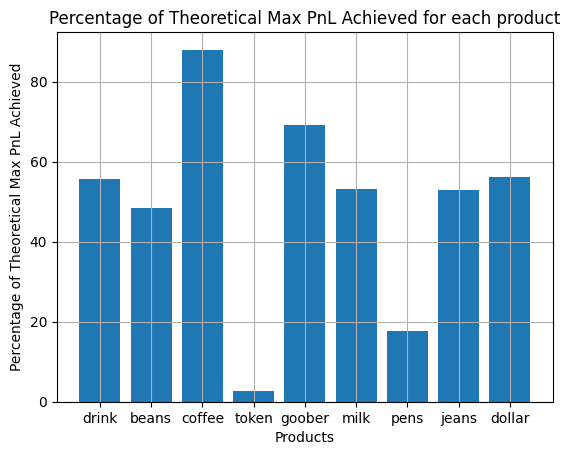

In [26]:
# plot the products and the percentage of the theoretical max PnL that was achieved
plt.bar(products, percent_achieved)
plt.xlabel('Products')
plt.ylabel('Percentage of Theoretical Max PnL Achieved')
plt.title('Percentage of Theoretical Max PnL Achieved for each product')
plt.grid()
plt.show()

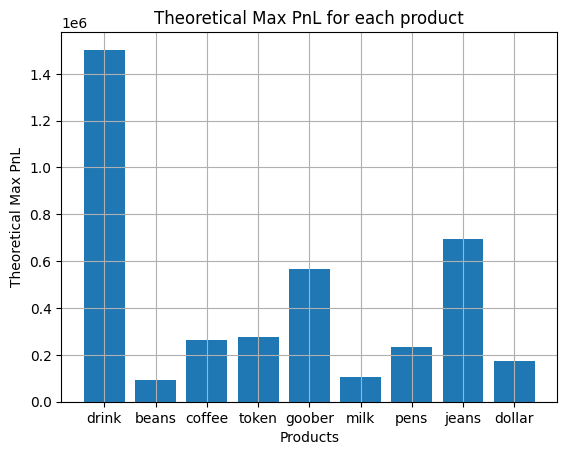

In [27]:
# plot products and max PnL possilbe
max_pnls = []
for i in range(len(dfs_out)):
    max_pnls.append(dfs_out[i].iloc[-1]["Theoretical Max PnL"])
plt.bar(products, max_pnls)

plt.xlabel('Products')
plt.ylabel('Theoretical Max PnL')
plt.title('Theoretical Max PnL for each product')
plt.grid()
plt.show()


Ok so combining all of our functions into one results in us breaching our budget limits on a bunch of days. To overcome this I will be trading each individual product, get total PnL, and also max budget used. From there, I can get a PnL/budget used number. From there, when we breach position limits, we scale down the worst PnL/budget value until we don't breach position limits.

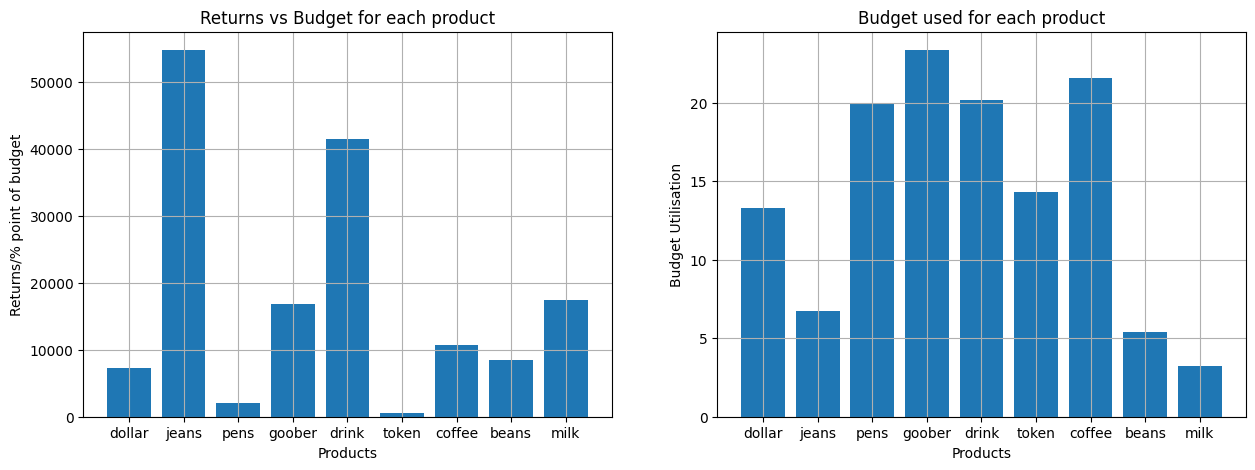

In [28]:
'''
UQDollar, returns = 96954, budget = 13.27%
Jeans, returns = 369036.00, budget = 6.74%
Pens, returns = 112400.00, budget = 19.92%
Goober, returns = 393000.00, budget = 23.35%
Drink, returns = 835400, budget = 20.18%
Token, returns = 42579.95, budget = 14.3
Coffee, returns = 230700, budget = 21.6%
Beans, returns = 45878, budget = 5.38%
Milk, returns = 56450, budget = 3.23%
'''
# create a list of the names in that order
product_names = ['dollar', 'jeans', 'pens', 'goober', 'drink', 'token', 'coffee', 'beans', 'milk']
# create a list of the returns in that order
returns = [dollar_achieved, jeans_achieved, pens_achieved, goober_achieved, drink_achieved, token_achieved, coffee_achieved, beans_achieved, milk_achieved]
# create a list of the budgets in that order
budgets = [13.27, 6.74, 19.92, 23.35, 20.18, 14.3, 21.6, 5.38, 3.23]

# element-wise divide the returns by the budgets
returns = pd.Series(returns)
budgets = pd.Series(budgets)
# returns/budgets
ratios = returns/budgets


# # plot the products and the returns/budgets
# fig, ax = plt.subplots()
# ax.bar(product_names, ratios, label='Returns')
# # ax.bar(products, budgets, label='Budget')
# plt.xlabel('Products')
# plt.ylabel('Returns/Budget')
# plt.title('Returns vs Budget for each product')
# plt.grid()
# plt.show()
# # plot products and max budget
# plt.bar(product_names, budgets)
# plt.xlabel('Products')
# plt.ylabel('Budget')
# plt.title('Budget for each product')
# plt.grid()
# plt.show()

# do the above as subplots
fig, ax = plt.subplots(1,2)
# adjust the size of the figure using figsize
fig.set_size_inches(15, 5)
ax[0].bar(product_names, ratios, label='Returns')
ax[0].grid()
ax[0].set_xlabel('Products')
ax[0].set_ylabel('Returns/% point of budget')
ax[0].set_title('Returns vs Budget for each product')
ax[1].bar(product_names, budgets, label='Budget')
plt.xlabel('Products')
plt.ylabel('Budget Utilisation')
plt.title('Budget used for each product')
plt.grid()
plt.show()



In [29]:
# sum total of all returns
total_returns = sum(returns)
print(f'Total returns if unscaled: {total_returns}')
# sum total of all budgets
total_budget = sum(budgets)
print(f'Theoretical worst case scenario: {round(total_budget, 2)}% used')

Total returns if unscaled: 2076136.38
Theoretical worst case scenario: 127.97% used


In [30]:
positionLimits = {
    "Fintech Token": 35,
    "Fun Drink": 10000,
    "Red Pens": 40000,
    "Thrifted Jeans": 400,
    "UQ Dollar": 650,
    "Coffee": 30000,
    "Coffee Beans": 200,
    "Goober Eats": 75000, 
    "Milk": 2500 
}

In [31]:
positions = {'Fintech Token': 0, 'Fun Drink': -10000, 'Red Pens': 40000, 'Thrifted Jeans': -400, 'UQ Dollar': 650, 'Coffee': -30000, 'Coffee Beans': 200, 'Goober Eats': -75000, 'Milk': -2500}
pos_values = {'Fintech Token': 0.0, 'Fun Drink': 83500.0, 'Red Pens': 86800.0, 'Thrifted Jeans': 19192.0, 'UQ Dollar': 64837.5, 'Coffee': 98400.0, 'Coffee Beans': 23880.0, 'Goober Eats': 114750.0, 'Milk': 12600.0}
total_val = sum(pos_values.values())
print(f'Total value of all positions: {total_val}')

Total value of all positions: 503959.5
